# 음악 제작사&유통사 영향력과 가온지수의 관계

- toc: true
- branch: master
- badges: true
- comments: true
- author: Kim Jeewoo
- categories: [R]
- image: images/gaon_logo.png

## 개요
가온 차트(Gaon Chart)는 대한민국의 대중음악 공인차트이다.

가온 주간 디지털 차트에서는 노래의 제작사와 배급사를 명시하고 있는데 제작사 또는 배급사의 영향력이 강할 수록 가온지수가 높지 않을까? 또한 별개로 특수한 경우가 있을까?

TOP 200 차트에서 제작사와 배급사의 출현 빈도를 영향력으로 간주하고 가온지수와의 상관관계를 관찰해보자.

가온 차트 데이터는 아래 링크에서 얻을 수 있다.

<http://gaonchart.co.kr/main/section/chart/online.gaon?nationGbn=T&serviceGbn=ALL>

*참고로 크롤링 코드는 해당 파일에 포함하지 않았다.

## imports

분석에 필요한 데이터 및 라이브러리를 가져온다.

In [5]:
# 필요한 라이브러리를 불러온다.
if (!require(pacman)) install.packages('pacman')

library(pacman)
pacman::p_load("tidyverse", "stringr", "repr")

# 필요한 파일을 불러온다.
gaon_month <- read.table('results/gaon_month.txt', header = TRUE)
gaon_week <- read.table('results/gaon_week.txt', header = TRUE)

# 가온지수가 존재하지 않는 행은 제거한다.
gaon_month_true <- gaon_month %>%
                    drop_na(gaon_index)
gaon_week_true <- gaon_week %>%
                    drop_na(gaon_index)

options(repr.plot.width=12, repr.plot.height=7)
options(scipen=999)

## 주간 가온지수 - 유통사(distribution)

In [6]:
dist_by <- gaon_week_true %>%
    group_by(distribution) %>%
    summarise(median = median(gaon_index), size = length(gaon_index)) %>%
    filter(size > 3)

head(dist_by)

distribution,median,size
<chr>,<dbl>,<int>
2%엔터테인먼트,2202147,7
Dreamus,6413856,5812
Kakao Entertainment,6063353,14778
NHN벅스,5041087,1279
Sony Music,3724498,1674
Stone Music Entertainment,9973699,1155


위 데이터프레임에서 median 컬럼은 **유통사의 가온지수 중앙값**을 의미하고 size 컬럼은 **차트 내 유통사 출현 빈도**를 의미한다. 이제 산점도를 그려보자.

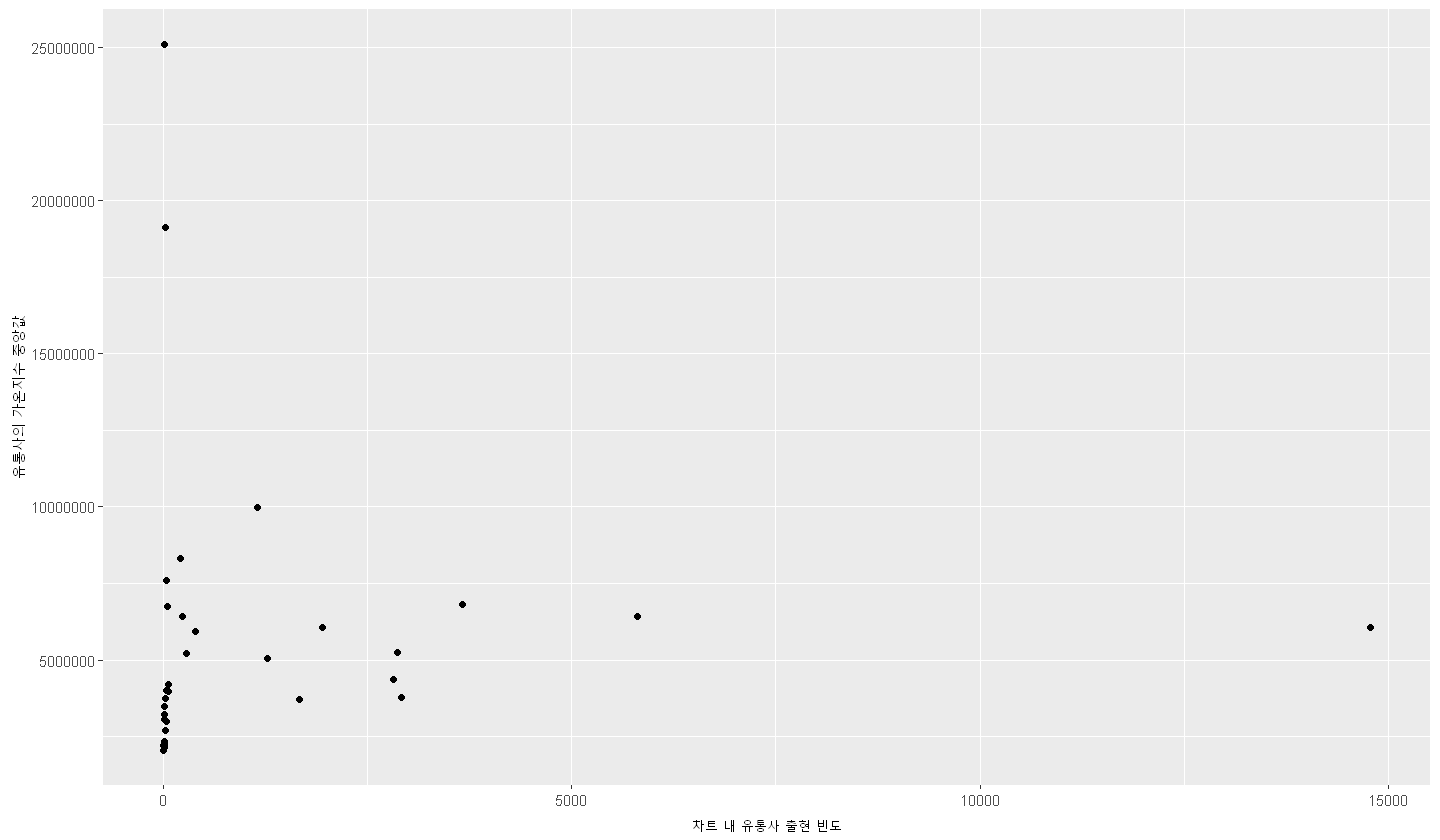

In [7]:
p <- ggplot(data = dist_by, aes(x = size, y = median)) + 
    geom_point()
p + xlab('차트 내 유통사 출현 빈도') + ylab('유통사의 가온지수 중앙값') 

위 그래프는 **차트 내 유통사 출현 빈도**와 **유통사의 가온지수 중앙값**을 산점도로 나타낸 것이다.

그런데 대부분의 점이 좌측 하단에 몰려있어 변수 사이의 관계를 파악하기 어렵다.

따라서 로그 변환을 취한 뒤 다시 산점도를 그려보고 회귀선도 그려보자.

`geom_smooth()` using formula 'y ~ x'



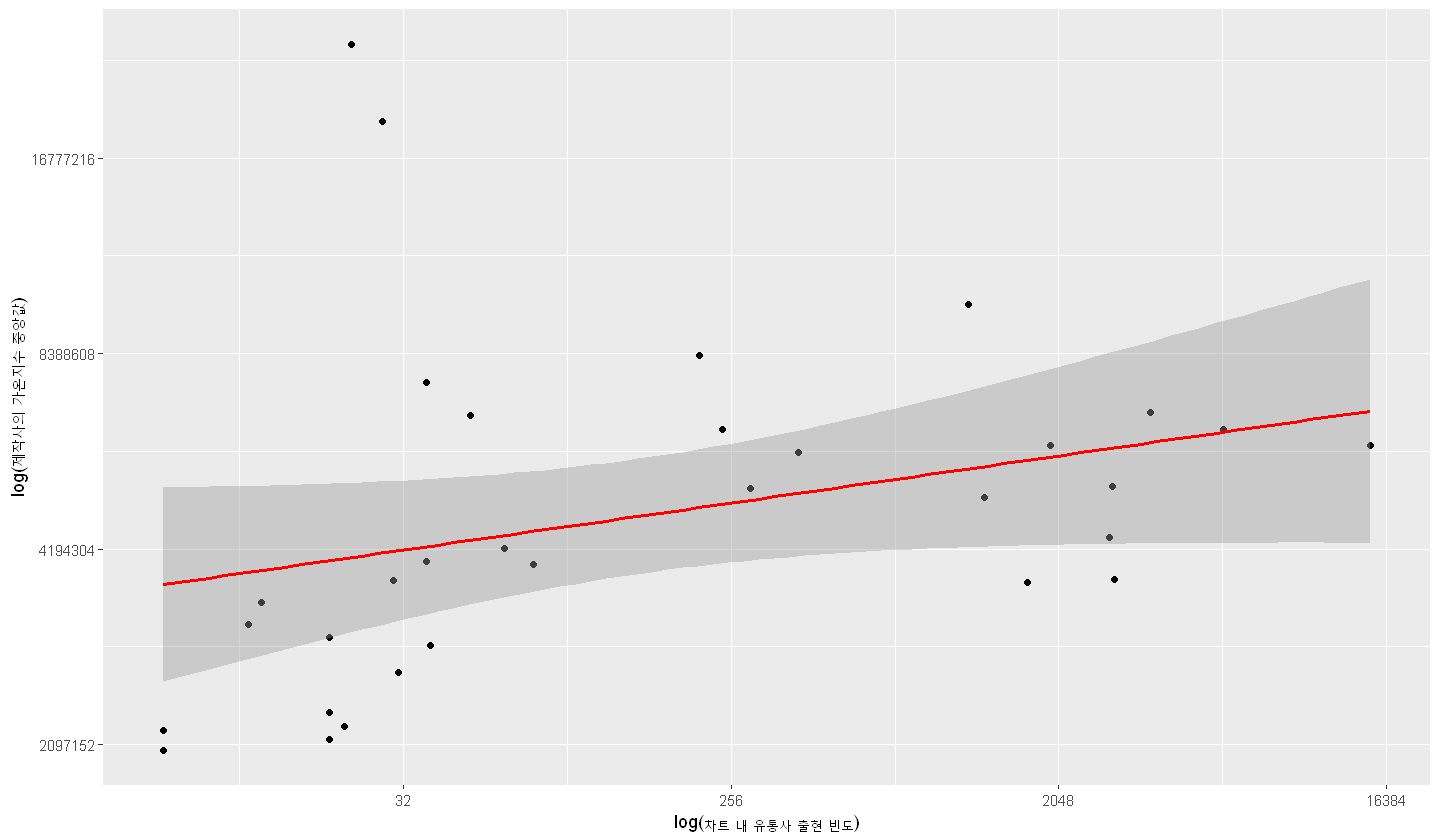

In [10]:
p + scale_x_continuous(trans = 'log2') +
    scale_y_continuous(trans = 'log2') + 
    geom_smooth(method = 'lm', col = 'red') +
    xlab('log(차트 내 유통사 출현 빈도)') + 
    ylab('log(제작사의 가온지수 중앙값)') 

로그 변환을 취한 위 산점도에서 **양의 상관관계를 보이고 있다.**

그러나 좌측 상단에 선형성을 크게 벗어나는 두 점이 존재하는데 **케미컬레코드** 와 **미러볼뮤직** 이다.

이는 각각 **롤린 - 브레이브걸스 (Brave Girls)**, **비행운 - 문문 (MoonMoon)** 두 곡이 역주행하며 발생한 현상이다.

- 역주행 : 발매 후 상당 시간 주목받지 못하던 노래가 어떤 사유로 갑자기 재조명되어 음악 차트 순위가 크게 상승하는 현상.

대부분의 곡들은 발매 직후 적당한 순위를 기록하였다가 인기가 점차 식으면서 순위가 내려가는 경우가 보통이지만 이 경우는 반대인 것이다.

실제로 롤린의 곡 발매일은 2017년 3월 7일이지만 가온차트 첫 진입은 2021년 10주차이다.

당시 브레이브걸스는 5년차 무명 아이돌 그룹으로, 계속되는 부진에 해체 수순을 밟고 있었으나 2021년 Youtube에 업로드된 3분 길이의 영상(https://www.youtube.com/watch?v=cfHWIqJkEf4)이 우연히 주목받게 되었고 엄청난 돌풍을 일으키며 국내 모든 음원차트에서 1위를 달성하였다.

비행운 또한 발매일은 2016년 11월 10일이지만 가온차트 첫 진입은 2018년 1주차이다.

문문은 무명 가수였으나 한 유명 프로듀서가 곡을 언급하자 입소문을 타며 큰 인기를 얻었고 역주행하여 지니뮤직 차트 1위를 달성하고 다른 차트에서도 상위 랭킹을 달성했다.

In [12]:
dist_by[order(dist_by$median, decreasing = T),] %>% head(4)

distribution,median,size
<chr>,<dbl>,<int>
케미컬레코드,25105123,23
미러볼뮤직,19128320,28
Stone Music Entertainment,9973699,1155
퍼플파인 엔터테인먼트,8326852,210


## 주간 가온지수 - 제작사(production)

In [13]:
prod_by <- gaon_week_true %>%
    group_by(production) %>%
    summarise(median = median(gaon_index), size = length(gaon_index)) %>%
    filter(size >= 3)

위 데이터프레임에서 median 컬럼은 **제작사의 가온지수 중앙값**을 의미하고 size 컬럼은 **차트 내 제작사 출현 빈도**를 의미한다. 이제 산점도를 그려보자.

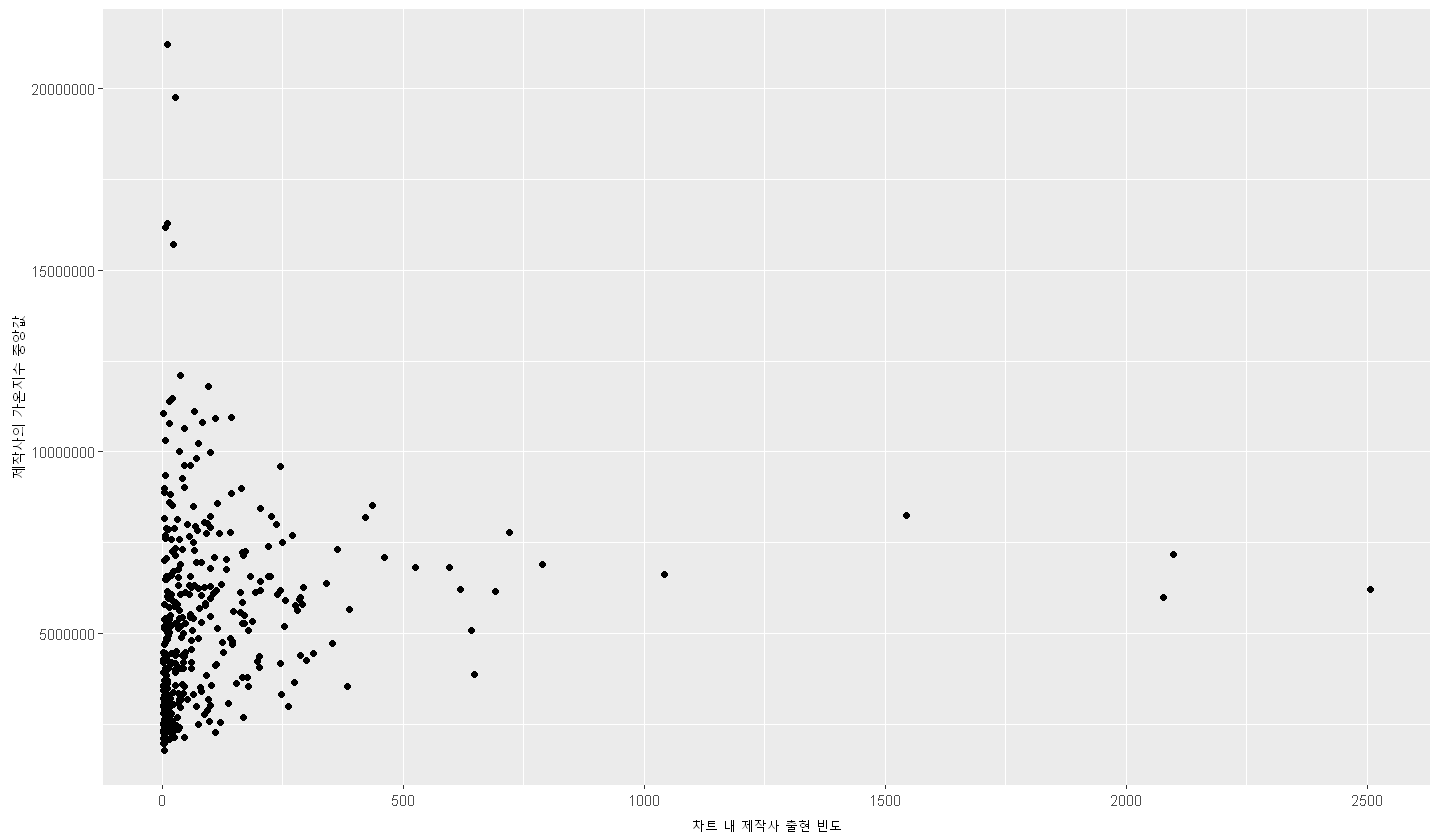

In [14]:
p <- ggplot(data = prod_by, aes(x = size, y = median)) + 
    geom_point()

p + xlab('차트 내 제작사 출현 빈도') + 
    ylab('제작사의 가온지수 중앙값') 

위 그래프는 **차트 내 제작사 출현 빈도**와 **유통사의 가온지수 중앙값**을 산점도로 나타낸 것이다.

그런데 대부분의 점이 좌측 하단에 몰려있어 변수 사이의 관계를 파악하기 어렵다.

따라서 로그 변환을 취하여 다시 산점도를 그려보고 회귀선도 그려보자.

`geom_smooth()` using formula 'y ~ x'



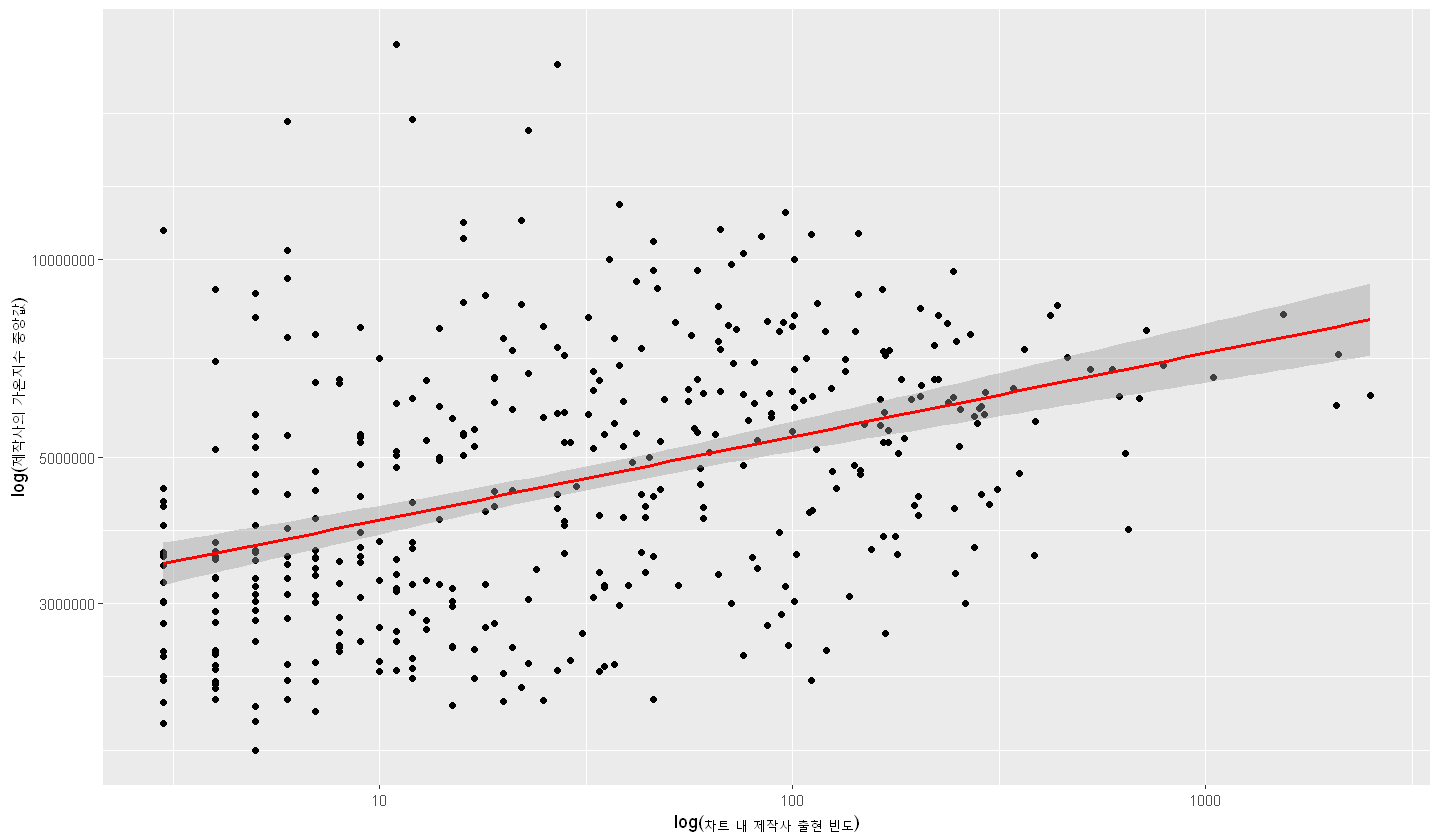

In [15]:
p + scale_x_continuous(trans = 'log10') +
    scale_y_continuous(trans = 'log10') +
    geom_smooth(method = 'lm', col = 'red') +
    xlab('log(차트 내 제작사 출현 빈도)') + 
    ylab('log(제작사의 가온지수 중앙값)') 

**위 산점도에서 양의 상관관계를 보이고 있다.**